In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Dataset of Heart.csv")

In [3]:
dataset.head(20)

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Flat,0,1,1
1,37,Male,Atypical Angina,130,250,False,ST Elevation,187,No,3.5,Up Sloping,0,2,1
2,41,Female,Typical Angina,130,204,False,Normal,172,No,1.4,Flat,0,2,1
3,56,Male,Typical Angina,120,236,False,ST Elevation,178,No,0.8,Flat,0,2,1
4,57,Female,Non-Angina,120,354,False,ST Elevation,163,Yes,0.6,Flat,0,2,1
5,57,Male,Non-Angina,140,192,False,ST Elevation,148,No,0.4,Up Sloping,0,1,1
6,56,Female,Typical Angina,140,294,False,Normal,153,No,1.3,Up Sloping,0,2,1
7,44,Male,Typical Angina,120,263,False,ST Elevation,173,No,0.0,Flat,0,3,1
8,52,Male,Atypical Angina,172,199,True,ST Elevation,162,No,0.5,Flat,0,3,1
9,57,Male,Atypical Angina,150,168,False,ST Elevation,174,No,1.6,Flat,0,2,1


In [4]:
dataset.describe()

,age,trtbps,chol,thalachh,oldpeak,ca,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.709571,2.323432,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.970496,0.587687,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,3.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   rest_ecg  303 non-null    object 
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: bool(1), float64(1), int64(7), object(5)
memory usage: 31.2+ KB


In [6]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalachh    0
exng        0
oldpeak     0
slope       0
ca          0
thall       0
target      0
dtype: int64

In [7]:
for i in list(dataset.columns):
    print("{} -- {}".format(i, dataset[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
rest_ecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slope -- 3
ca -- 4
thall -- 3
target -- 2


In [8]:
categorical_list = ["sex", "cp", "fbs", "rest_ecg","exng", "slope", "ca", "thall", "target"]

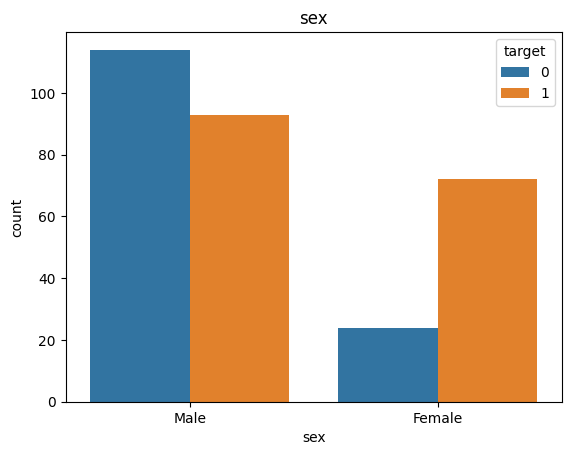

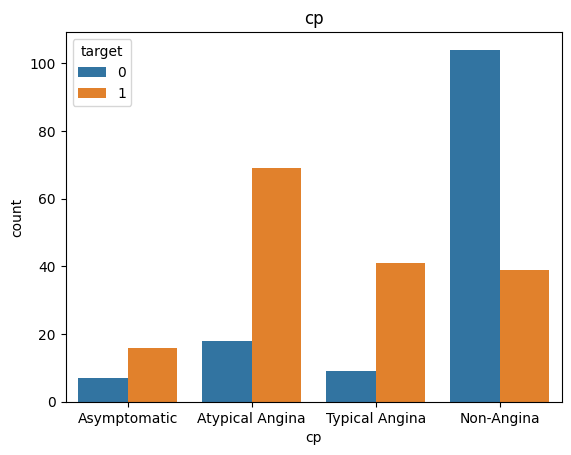

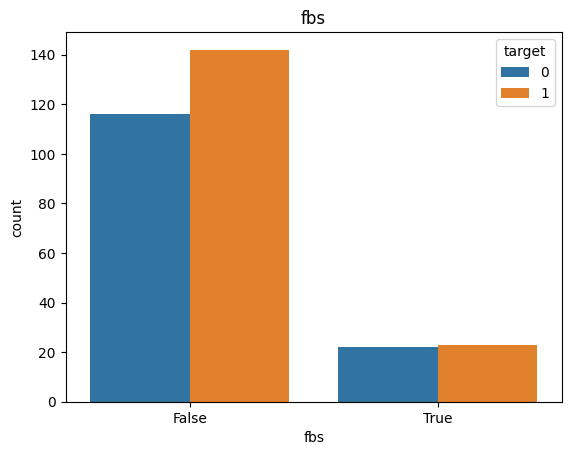

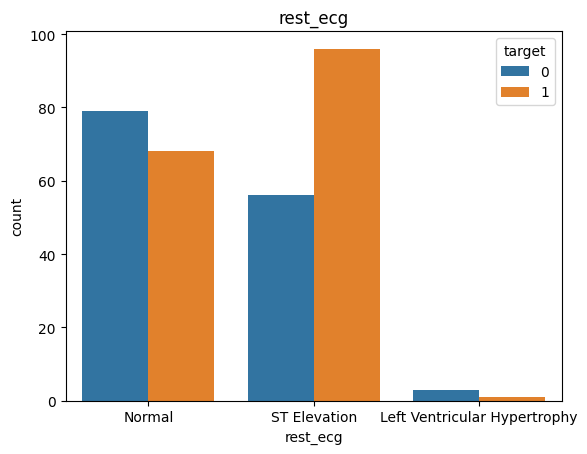

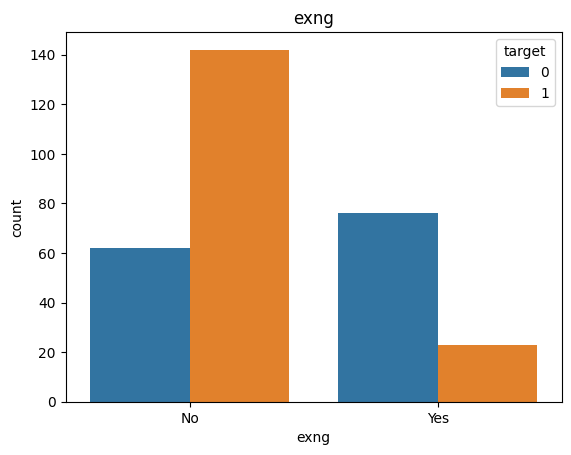

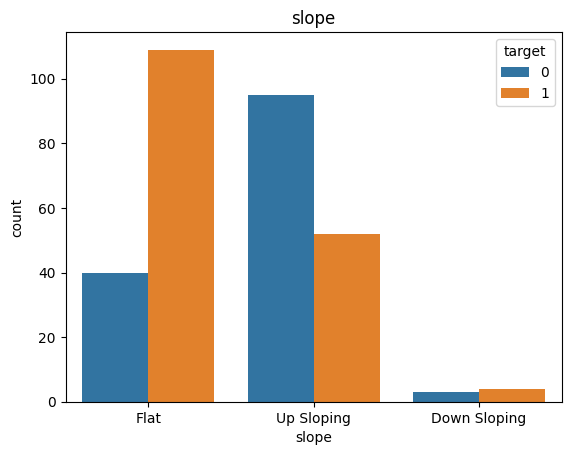

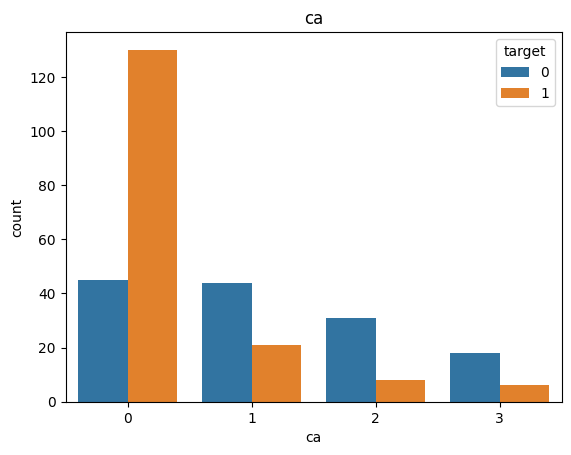

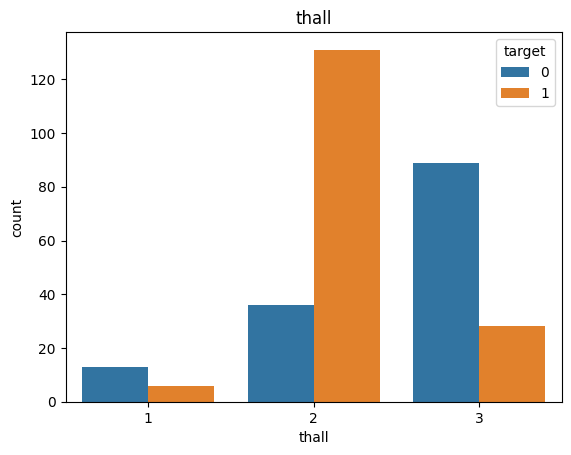

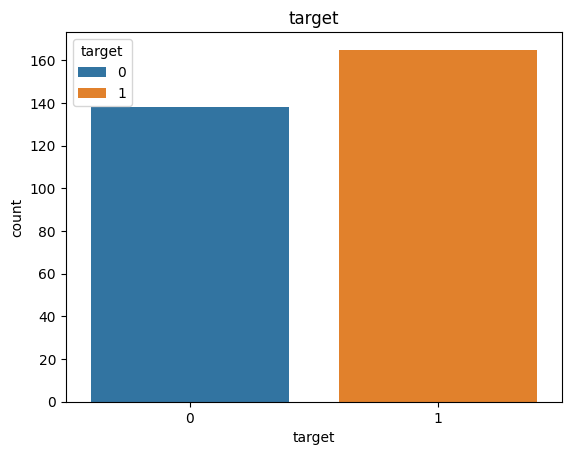

In [9]:
categoric_dataset = dataset.loc[:, categorical_list].values
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = dataset, hue = "target")
    plt.title(i)

In [10]:
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "target"]

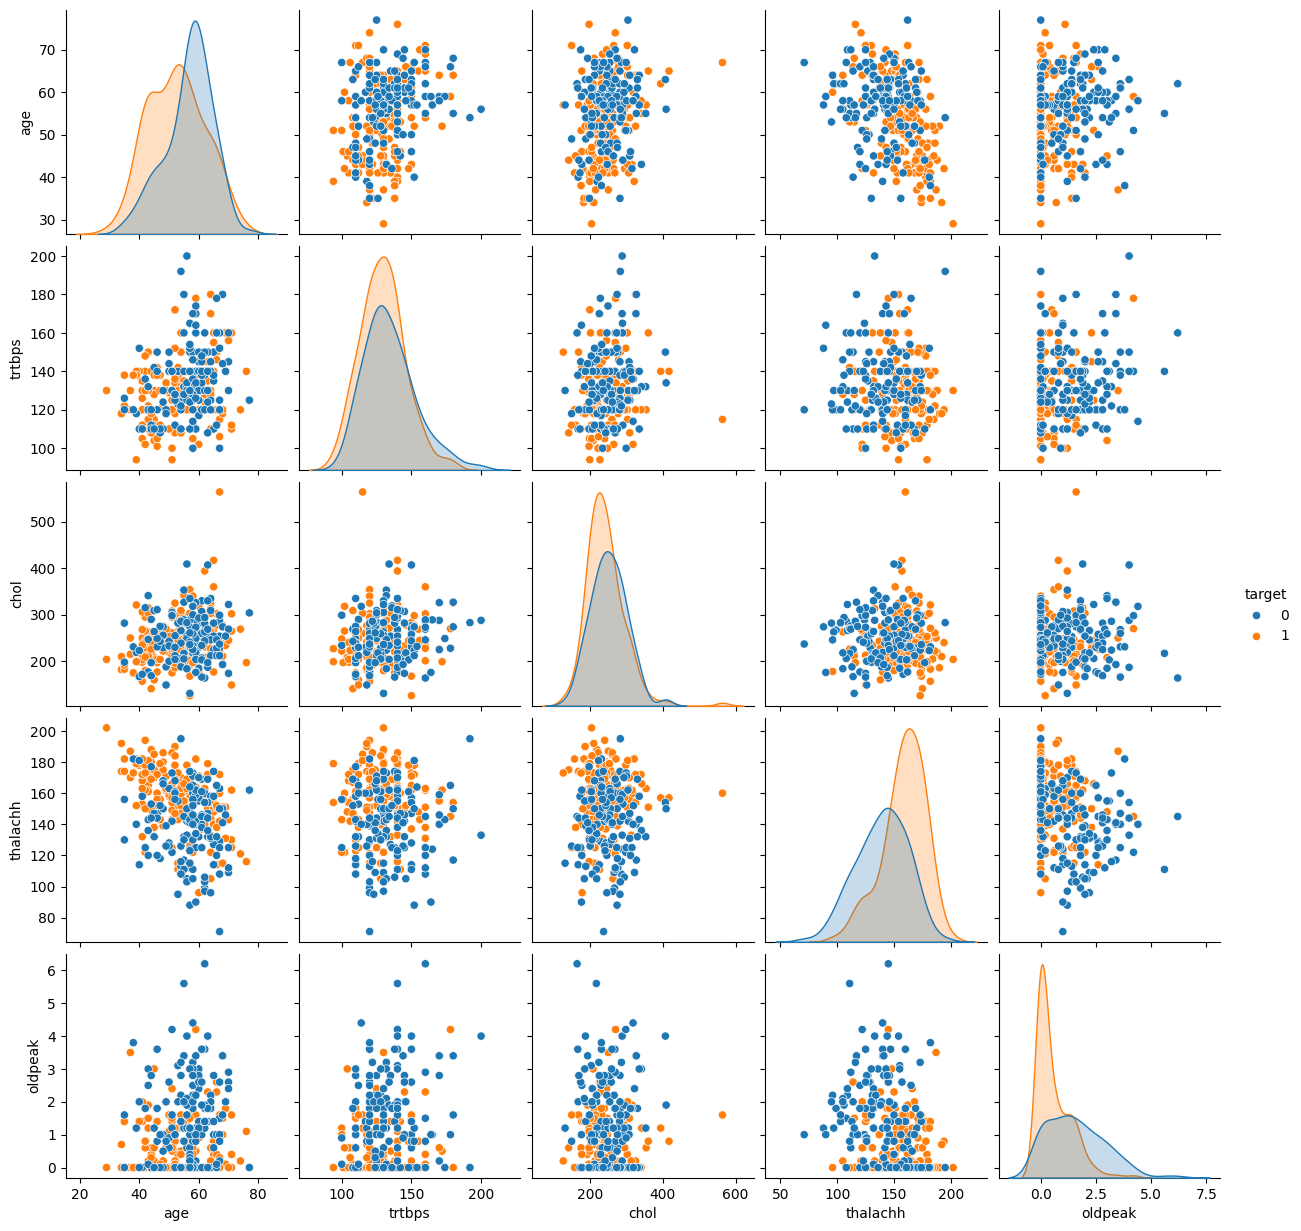

In [11]:
numeric_dataset = dataset.loc[:, numeric_list]
sns.pairplot(numeric_dataset, hue = "target", diag_kind = "kde")
plt.show()

In [12]:
sc = StandardScaler()
sc

,copy,True
,with_mean,True
,with_std,True


In [13]:
scaled_array = sc.fit_transform(dataset[numeric_list[: -1]])

In [14]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [15]:
dataset_dummy = pd.DataFrame(scaled_array, columns = numeric_list[: -1])

In [16]:
dataset_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [17]:
dataset_dummy = pd.concat([dataset_dummy, dataset.loc[:, "target"]], axis = 1)

In [18]:
dataset_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [19]:
data_melt = pd.melt(dataset_dummy, id_vars = "target", var_name = "features", value_name = "value")

In [20]:
data_melt.head(20)

,target,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


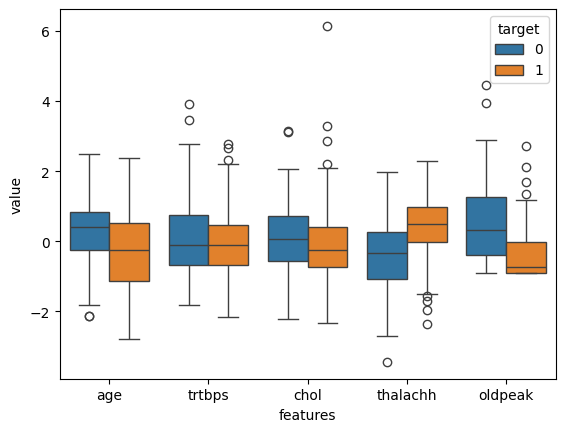

In [21]:
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melt)
plt.show()

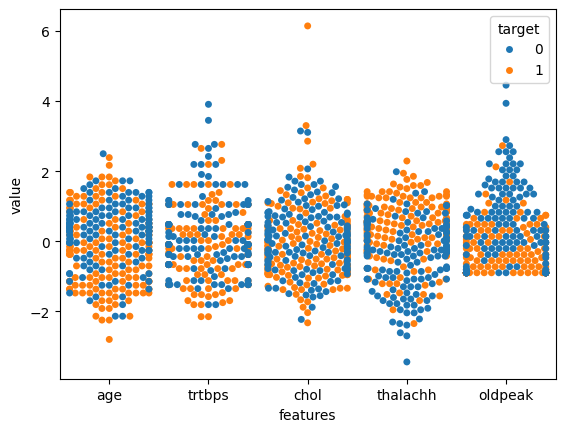

In [22]:
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "target", data = data_melt)
plt.show()

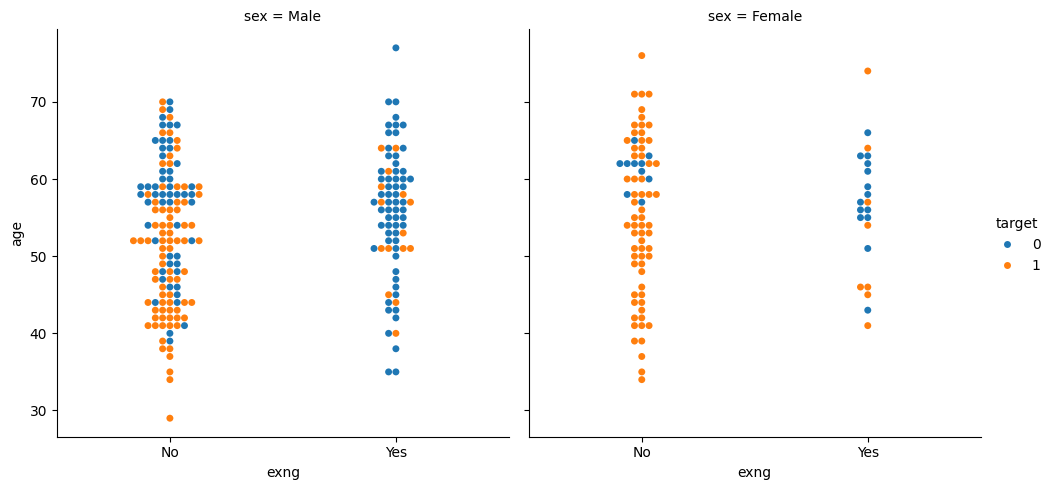

In [23]:
sns.catplot(x = "exng", y = "age", hue = "target", col = "sex", kind = "swarm", data = dataset)
plt.show()

In [24]:
dataset.head(20)

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
0,63,Male,Asymptomatic,145,233,True,Normal,150,No,2.3,Flat,0,1,1
1,37,Male,Atypical Angina,130,250,False,ST Elevation,187,No,3.5,Up Sloping,0,2,1
2,41,Female,Typical Angina,130,204,False,Normal,172,No,1.4,Flat,0,2,1
3,56,Male,Typical Angina,120,236,False,ST Elevation,178,No,0.8,Flat,0,2,1
4,57,Female,Non-Angina,120,354,False,ST Elevation,163,Yes,0.6,Flat,0,2,1
5,57,Male,Non-Angina,140,192,False,ST Elevation,148,No,0.4,Up Sloping,0,1,1
6,56,Female,Typical Angina,140,294,False,Normal,153,No,1.3,Up Sloping,0,2,1
7,44,Male,Typical Angina,120,263,False,ST Elevation,173,No,0.0,Flat,0,3,1
8,52,Male,Atypical Angina,172,199,True,ST Elevation,162,No,0.5,Flat,0,3,1
9,57,Male,Atypical Angina,150,168,False,ST Elevation,174,No,1.6,Flat,0,2,1


In [25]:
rest_uniq = dataset["rest_ecg"].unique()
print(rest_uniq)

['Normal' 'ST Elevation' 'Left Ventricular Hypertrophy']


In [26]:
slope_uniq = dataset["slope"].unique()
print(slope_uniq)

['Flat' 'Up Sloping' 'Down Sloping']


In [27]:
dataset["sex"] = [0 if i == "Male" else 1 if i == "Female" else None for i in dataset["sex"]]
dataset["cp"] = [0 if i == "Non-Angina" else 1 if i == "Typical Angina" else 2 if i == "Atypical Angina" else 3 if i == "Asymptomatic" else None for i in dataset["cp"]]
dataset["rest_ecg"] = [0 if i == "Normal" else 1 if i == "ST Elevation" else 2 if i == "Left Ventricular Hypertrophy" else None for i in dataset["rest_ecg"]]
dataset["exng"] = [0 if i == "No" else 1 if i == "Yes" else None for i in dataset["exng"]]

In [28]:
dataset.head(10)

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
0,63,0,3,145,233,True,0,150,0,2.3,Flat,0,1,1
1,37,0,2,130,250,False,1,187,0,3.5,Up Sloping,0,2,1
2,41,1,1,130,204,False,0,172,0,1.4,Flat,0,2,1
3,56,0,1,120,236,False,1,178,0,0.8,Flat,0,2,1
4,57,1,0,120,354,False,1,163,1,0.6,Flat,0,2,1
5,57,0,0,140,192,False,1,148,0,0.4,Up Sloping,0,1,1
6,56,1,1,140,294,False,0,153,0,1.3,Up Sloping,0,2,1
7,44,0,1,120,263,False,1,173,0,0.0,Flat,0,3,1
8,52,0,2,172,199,True,1,162,0,0.5,Flat,0,3,1
9,57,0,2,150,168,False,1,174,0,1.6,Flat,0,2,1


In [29]:
dataset["slope"] = dataset["slope"].replace("Flat", 2)

In [30]:
dataset["slope"] == [0 if i == "Up_Sloping" else 1 if i == "Down_Sloping" else 2 if i == "Flat" else None for i in dataset["slope"]]

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: slope, Length: 303, dtype: bool

In [31]:
dataset.head(20)

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
0,63,0,3,145,233,True,0,150,0,2.3,2,0,1,1
1,37,0,2,130,250,False,1,187,0,3.5,Up Sloping,0,2,1
2,41,1,1,130,204,False,0,172,0,1.4,2,0,2,1
3,56,0,1,120,236,False,1,178,0,0.8,2,0,2,1
4,57,1,0,120,354,False,1,163,1,0.6,2,0,2,1
5,57,0,0,140,192,False,1,148,0,0.4,Up Sloping,0,1,1
6,56,1,1,140,294,False,0,153,0,1.3,Up Sloping,0,2,1
7,44,0,1,120,263,False,1,173,0,0.0,2,0,3,1
8,52,0,2,172,199,True,1,162,0,0.5,2,0,3,1
9,57,0,2,150,168,False,1,174,0,1.6,2,0,2,1


In [32]:
dataset["slope"] = dataset["slope"].replace("Up Sloping", 0)
dataset["slope"] = dataset["slope"].replace("Down Sloping", 1)

In [33]:
dataset.head(10)

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
0,63,0,3,145,233,True,0,150,0,2.3,2,0,1,1
1,37,0,2,130,250,False,1,187,0,3.5,0,0,2,1
2,41,1,1,130,204,False,0,172,0,1.4,2,0,2,1
3,56,0,1,120,236,False,1,178,0,0.8,2,0,2,1
4,57,1,0,120,354,False,1,163,1,0.6,2,0,2,1
5,57,0,0,140,192,False,1,148,0,0.4,0,0,1,1
6,56,1,1,140,294,False,0,153,0,1.3,0,0,2,1
7,44,0,1,120,263,False,1,173,0,0.0,2,0,3,1
8,52,0,2,172,199,True,1,162,0,0.5,2,0,3,1
9,57,0,2,150,168,False,1,174,0,1.6,2,0,2,1


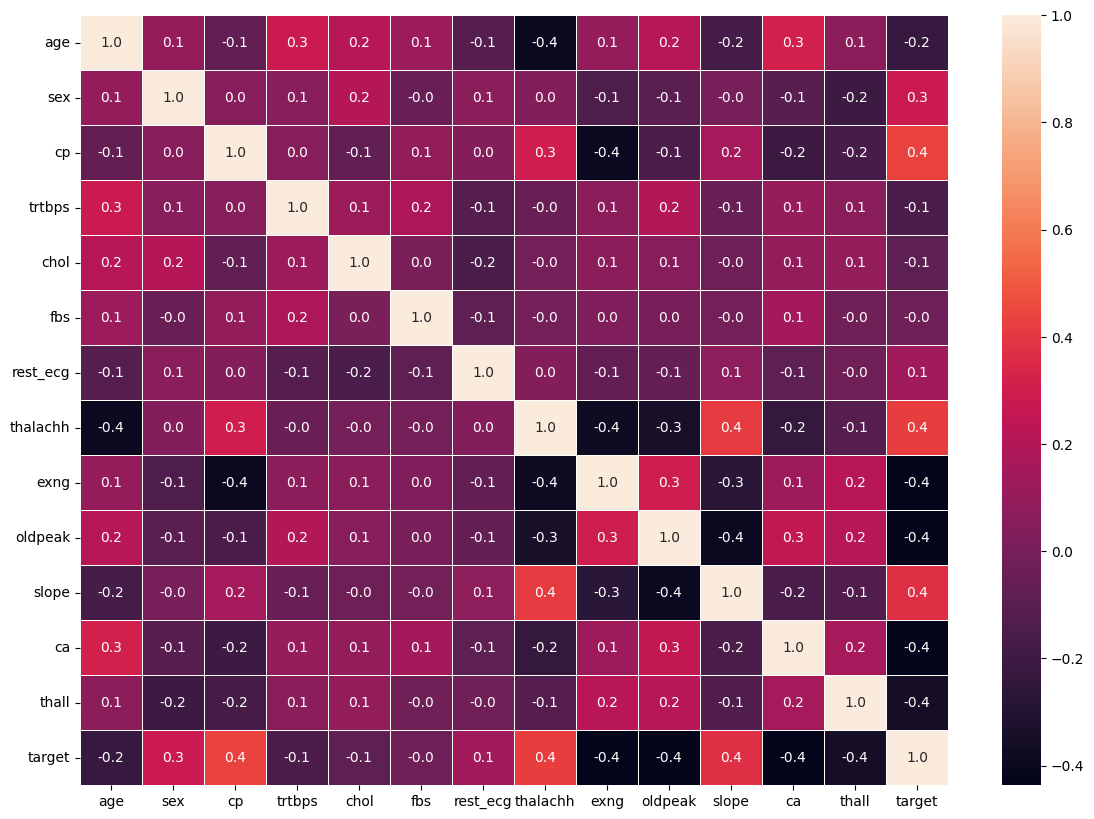

In [34]:
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(), annot = True, fmt = ".1f", linewidths = ".7")
plt.show()

In [148]:
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "target"]
numeric_dataset = dataset.loc[:, numeric_list]
numeric_dataset.head()

,age,trtbps,chol,thalachh,oldpeak,target
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1


In [150]:
dataset.describe()

,age,sex,cp,trtbps,chol,rest_ecg,thalachh,exng,oldpeak,slope,ca,thall,target
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.244966,0.312081,0.966443,131.023490,244.302013,0.536913,149.500000,0.325503,1.019463,1.016779,0.701342,2.312081,0.550336
std,9.079358,0.464122,1.034204,16.566247,47.831805,0.525748,22.916662,0.469351,1.142634,0.989705,0.964731,0.585965,0.498297
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,55.000000,0.000000,1.000000,130.000000,240.000000,1.000000,152.500000,0.000000,0.750000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,417.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [152]:
for i in numeric_list:

    Q1 = np.percentile(dataset.loc[:, i], 25)
    Q3 = np.percentile(dataset.loc[:, i], 75)

    IQR = Q3 - Q1

    print("Old shape", dataset.loc[:, i].shape)

    upper = np.where(dataset.loc[:, i] >= (Q3 + 2.5 * IQR))

    lower = np.where(dataset.loc[:, i] <= (Q1 - 2.5 * IQR))


    print("{} -- {}".format(upper, lower))

    try:
        dataset.drop(upper[0], inplace = True)
    except:
        print("KeywordError: {} not found in axis".format(upper[0]))

    try:
        dataset.drop(lower[0], inplace = True)
    except:
        print("KeywordError: {} not found in axis".format(lower[0]))

    print("New Shape: ", dataset.shape)

Old shape (298,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New Shape:  (298, 14)
Old shape (298,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New Shape:  (298, 14)
Old shape (298,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New Shape:  (298, 14)
Old shape (298,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New Shape:  (298, 14)
Old shape (298,)
(array([202, 218]),) -- (array([], dtype=int64),)
New Shape:  (296, 14)
Old shape (296,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New Shape:  (296, 14)


In [154]:
dataset1 = dataset.copy()

In [166]:
dataset1 = pd.get_dummies(dataset1, columns = categorical_list[: -1], drop_first = True)
dataset1.head()

,age,trtbps,chol,thalachh,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,rest_ecg_1,rest_ecg_2,exng_1,slope_1,slope_2,ca_1,ca_2,ca_3,thall_2,thall_3
0,63,145,233,150,2.3,1,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,37,130,250,187,3.5,1,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,True,True,False,False,...,False,False,False,False,True,False,False,False,True,False
3,56,120,236,178,0.8,1,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False
4,57,120,354,163,0.6,1,True,False,False,False,...,True,False,True,False,True,False,False,False,True,False


In [168]:
dataset1.head(10)

,age,trtbps,chol,thalachh,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,rest_ecg_1,rest_ecg_2,exng_1,slope_1,slope_2,ca_1,ca_2,ca_3,thall_2,thall_3
0,63,145,233,150,2.3,1,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,37,130,250,187,3.5,1,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,True,True,False,False,...,False,False,False,False,True,False,False,False,True,False
3,56,120,236,178,0.8,1,False,True,False,False,...,True,False,False,False,True,False,False,False,True,False
4,57,120,354,163,0.6,1,True,False,False,False,...,True,False,True,False,True,False,False,False,True,False
5,57,140,192,148,0.4,1,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,56,140,294,153,1.3,1,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
7,44,120,263,173,0.0,1,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
8,52,172,199,162,0.5,1,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
9,57,150,168,174,1.6,1,False,False,True,False,...,True,False,False,False,True,False,False,False,True,False


In [170]:
X = dataset1.drop(["target"], axis = 1)
y = dataset1["target"]

In [172]:
sc = StandardScaler()
sc

,copy,True
,with_mean,True
,with_std,True


In [174]:
X[numeric_list[: -1]] = sc.fit_transform(X[numeric_list[: -1]])

In [176]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_True,rest_ecg_1,rest_ecg_2,exng_1,slope_1,slope_2,ca_1,ca_2,ca_3,thall_2,thall_3
0,0.970634,0.848894,-0.233523,0.012887,1.128111,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False
1,-1.895828,-0.057137,0.121488,1.635152,2.180936,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,-1.454834,-0.057137,-0.839131,0.977477,0.338493,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False
3,0.198894,-0.661158,-0.170874,1.240547,-0.187920,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False
4,0.309143,-0.661158,2.293323,0.582872,-0.363391,True,False,False,False,False,True,False,True,False,True,False,False,False,True,False


In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train {}".format(X_train.shape))
print("X_test {}".format(X_test.shape))
print("y_train {}".format(y_train.shape))
print("y_test {}".format(y_test.shape))

X_train (266, 20)
X_test (30, 20)
y_train (266,)
y_test (30,)


In [180]:
regressor = LogisticRegression()
regressor

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [182]:
regressor.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [184]:
y_pred_prob = regressor.predict_proba(X_test)

In [186]:
y_pred_prob

array([[0.29018658, 0.70981342],
       [0.40762137, 0.59237863],
       [0.03555159, 0.96444841],
       [0.23968189, 0.76031811],
       [0.89827991, 0.10172009],
       [0.22808073, 0.77191927],
       [0.02844097, 0.97155903],
       [0.04549084, 0.95450916],
       [0.86359091, 0.13640909],
       [0.97458287, 0.02541713],
       [0.61705324, 0.38294676],
       [0.02860939, 0.97139061],
       [0.98108778, 0.01891222],
       [0.01434405, 0.98565595],
       [0.0850347 , 0.9149653 ],
       [0.06536275, 0.93463725],
       [0.02758032, 0.97241968],
       [0.95102173, 0.04897827],
       [0.81905887, 0.18094113],
       [0.03386399, 0.96613601],
       [0.45967149, 0.54032851],
       [0.20686495, 0.79313505],
       [0.09084256, 0.90915744],
       [0.91414186, 0.08585814],
       [0.52586765, 0.47413235],
       [0.40235618, 0.59764382],
       [0.03834152, 0.96165848],
       [0.60641342, 0.39358658],
       [0.02850271, 0.97149729],
       [0.67826548, 0.32173452]])

In [188]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0])

In [190]:
print("Accuracy: {}".format(accuracy_score(y_pred, y_test)))

Accuracy: 0.8666666666666667


In [204]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])

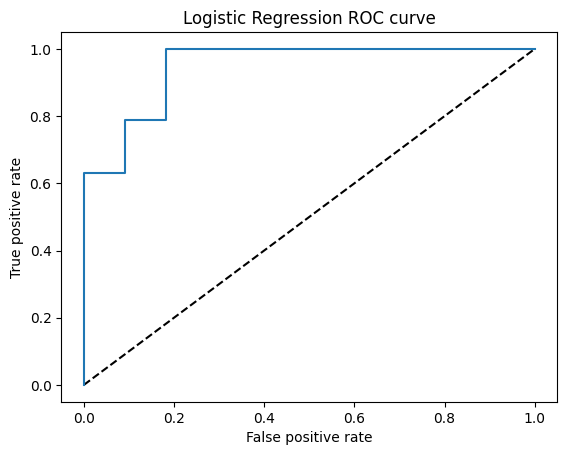

In [208]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression ROC curve")
plt.show()

In [210]:
penalty = ["l1", "l2"]
param = {"penalty": penalty}

In [212]:
regressor_search = GridSearchCV(regressor, param)

In [214]:
regressor_search.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'penalty': ['l1', 'l2']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [216]:
print("Best parameters: ", regressor_search.best_params_)

Best parameters:  {'penalty': 'l2'}


In [218]:
y_pred1 = regressor_search.predict(X_test)

In [220]:
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred1)))

Accuracy score: 0.8666666666666667
